In [13]:
import numpy as np
import pandas as pd
import joblib
import glob
import os, sys
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sn

In [40]:
timeseries_vars = joblib.load('./results/timeseries/1_1/timeseries_1_1_0.pkl')

var F len=323
var X len=323
var Y len=323
var Z len=323
var E len=323


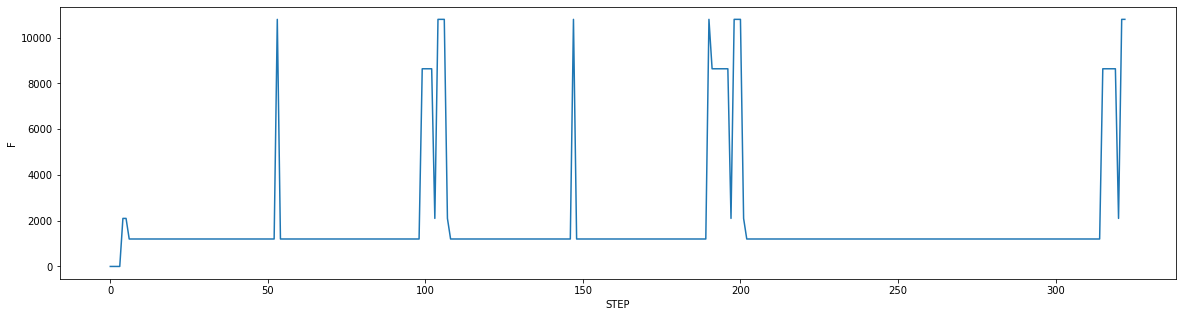

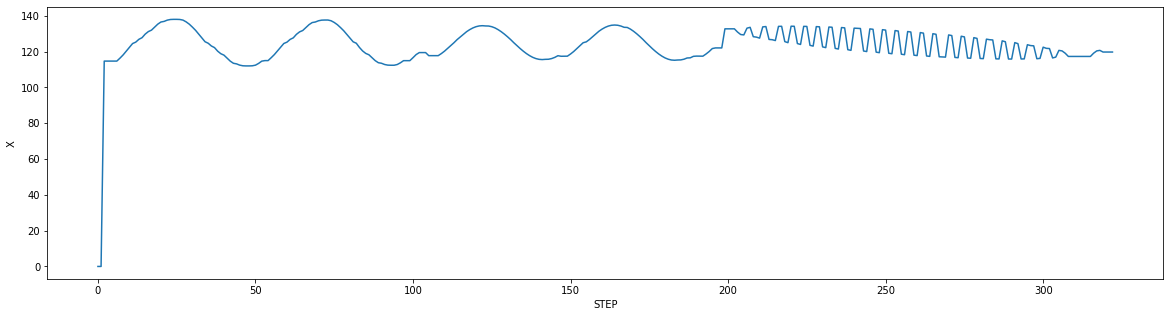

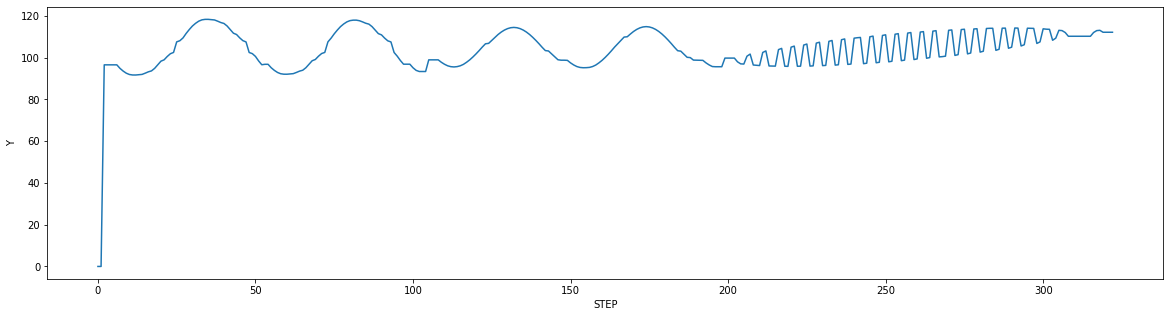

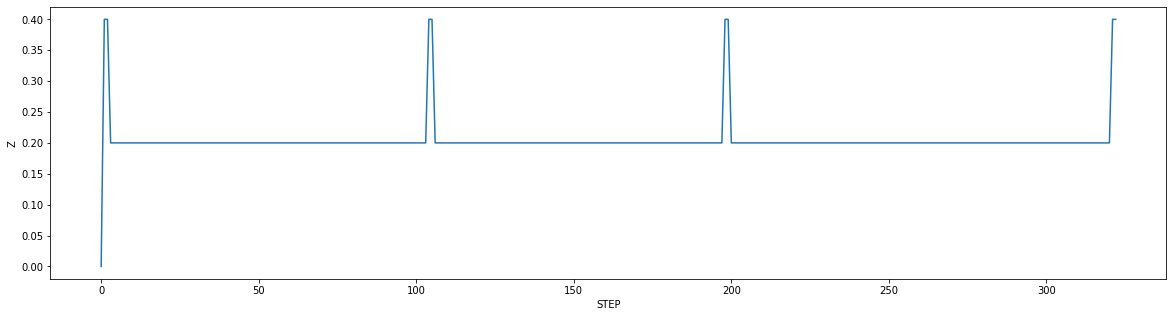

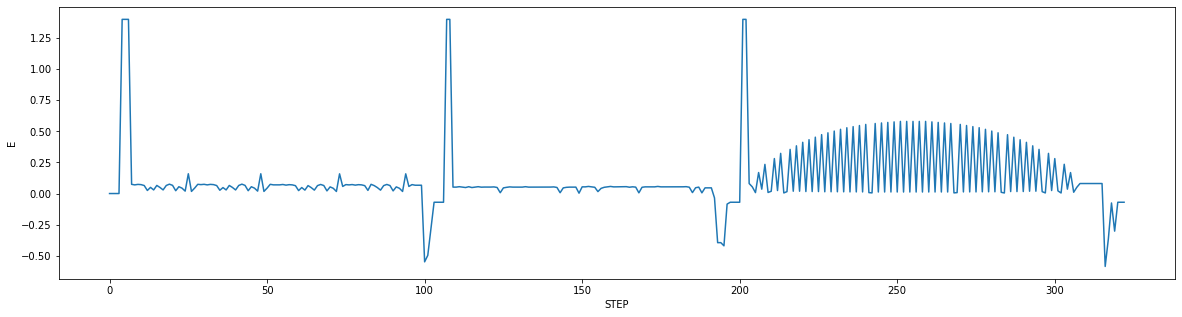

In [41]:
def plot_timeseries(vars):
    for k, v in vars.items():
        print(f'var {k} len={len(v)}')
        plt.figure(figsize=(20, 5))
        plt.plot(np.arange(len(v)), v)
        plt.xlabel('STEP')
        plt.ylabel(k)
plot_timeseries(timeseries_vars)

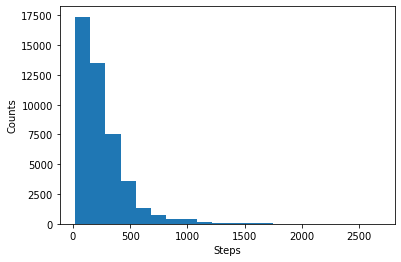

2678


In [6]:
timeseries_files = glob.glob(os.path.join('results', 'timeseries', '**', '*.pkl'))
def plot_step_dist(files):
    steps = []
    for f in files:
        timeseries = joblib.load(f)
        steps.append(len(timeseries['F']))
    plt.hist(steps, bins=20)
    plt.xlabel('Steps')
    plt.ylabel('Counts')
    plt.show()
    print(np.max(steps))
plot_step_dist(timeseries_files)

In [2]:
mat = np.load(os.path.join('results', 'voxel', 'coords', 'voxel_1_1.npy'))
slices_dir = os.path.join('results', 'voxel', 'slices')
slices = glob.glob(os.path.join(slices_dir, '1_1', '*.png'))

(1547781, 3)


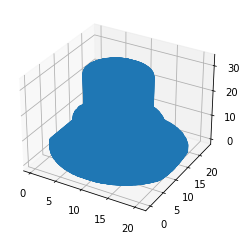

In [13]:
def plot_voxel_3d(mat):
    print(mat.shape)
    plt.figure()
    ax = plt.axes(projection='3d')
    ax.scatter3D(mat[:, 0], mat[:, 1], mat[:, 2])

plot_voxel_3d(mat)

In [5]:
def show_slices_sizes():
    slices = glob.glob(os.path.join(slices_dir, '**', '*.png'))
    max_s = -1
    for sfile in slices[:]:
        s = Image.open(sfile)
        max_s = np.max([max_s, np.max(s.size)])
    print(max_s)
show_slices_sizes()

1405


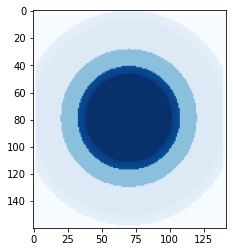

In [39]:
def plot_voxel_2d(slices):
    summed = 0
    for sfile in slices:
        s = Image.open(sfile)
        s = np.array(s)
        summed += s
    summed = summed / len(slices) * 255
    plt.imshow(summed, cmap='Blues')
plot_voxel_2d(slices)

In [24]:
res_t = joblib.load('./results/test/timeseries/time/preds_time.pkl')
res_s = joblib.load('./results/test/slice/time/preds_time.pkl')

In [36]:
def get_diff(res, truncate=True):
    res = np.abs(np.array(res['preds']) - np.array(res['targets'])) / (np.array(res['targets']) + 1e-6) * 100
    if truncate:
        res = res[res <= 100]
    return res

<AxesSubplot:ylabel='Count'>

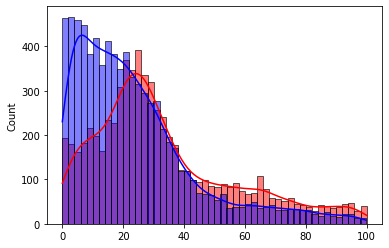

In [38]:
sn.histplot(get_diff(res_t), bins=50, kde=True, color='r')
sn.histplot(get_diff(res_s), bins=50, kde=True, color='b')
# plt.xlim((-5, 100))